## Здравствуйте, меня зовут *Максим Находнов*, вот моё Задание №2 по курсу ПСАД-2020!

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd

import seaborn as sns
import statsmodels.stats.proportion
from matplotlib import pyplot as plt

from collections import defaultdict

sns.set()
%matplotlib inline
np.random.seed(228)

### Задача 1  

Задана выборка, включающая значения переменной $X$. 

X sample mean:  5.206


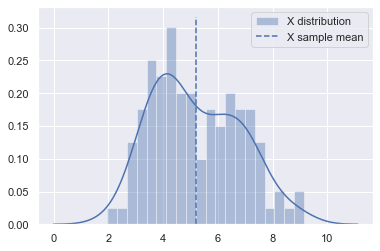

In [2]:
X = pd.read_excel('t1_data.xlsx').values.ravel()

sns.distplot(X, label='X distribution', bins=20)
plt.vlines(X.mean(), *plt.ylim(), linestyles='--', colors='b', label="X sample mean")
plt.legend()
print("X sample mean: ", np.round(X.mean(), 3))
plt.show()

Определите доверительный интервал для математического ожидания на уровне $\alpha$ (для каждого $\alpha$ из списка) c использованием...

In [3]:
alpha_list = np.array([0.1, 0.075, 0.05, 0.025, 0.01]) 

Распределения Стьюдента

In [4]:
def student_mci(data, alpha=0.05):
    t_gamma = scipy.stats.t(data.shape[0] - 1).ppf(1.0 - alpha / 2.0)
    x_mean = np.mean(data)
    s = np.std(data, ddof=1)
    
    return x_mean - t_gamma * s / np.sqrt(data.shape[0]), x_mean + t_gamma * s / np.sqrt(data.shape[0])

Бутстрэп оценивания

In [5]:
def bootstrap_mci(data, alpha=0.05):
    t_gamma = scipy.stats.t(data.shape[0] - 1).ppf(1.0 - alpha / 2.0)
    means = np.mean(np.random.choice(data, [10000, data.shape[0]]), axis=1)

    return np.mean(means) - t_gamma * np.std(means, ddof=1), np.mean(means) + t_gamma * np.std(means, ddof=1)    

Сравните результаты и сделайте выводы.

In [6]:
res = defaultdict(list)
res["alpha"] = alpha_list
res["Student"] = [np.round(student_mci(X, alpha), 3) for alpha in alpha_list]
res["Bootstrap"] = [np.round(bootstrap_mci(X, alpha), 3) for alpha in alpha_list]
res = pd.DataFrame(res)
res

,alpha,Student,Bootstrap
0,0.100,"[4.956, 5.456]","[4.956, 5.452]"
1,0.075,"[4.935, 5.477]","[4.935, 5.478]"
2,0.050,"[4.907, 5.505]","[4.911, 5.501]"
3,0.025,"[4.863, 5.549]","[4.863, 5.549]"
4,0.010,"[4.81, 5.602]","[4.81, 5.601]"


**Выводы:** значения доверительных интервалов, полученных параметрическим методом и с использованием ресамплинга, в приемлемой степени совпадают, то это является веским аргументом, что этой интервальной оценке параметра можно доверять

### Задача 2

Два предприятия выпускают  изделия одного и того же назначения. Предприятие I выпускает изделия с математическим ожиданием срока службы $T_1$, предприятие II выпускает изделия с математическим ожиданием срока службы $T_2$. Сроки службы изделий обоих предприятий распределены нормально и стандартные отклонения для них равны $\sigma_1$ и $\sigma_2$ соответственно. При этом $T_1 < T_2$, но изделия второго предприятия дороже.

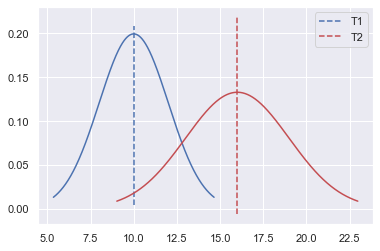

In [7]:
T1, T2, sigma1, sigma2 = 10, 16, 2, 3

def plot_T(T, sigma, c, label):
    norm = sp.stats.norm(loc=T, scale=sigma)
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
    plt.plot(x, norm.pdf(x), c=c)
    plt.vlines(T, *plt.ylim(), linestyles='--', colors=c, label=label)
    
plot_T(T1, sigma1, 'b', 'T1')
plot_T(T2, sigma2, 'r', 'T2')
plt.legend()
plt.show()

Третье предприятие утверждает, что ему удалось разработать технологию производства изделий со средним сроком службы  предприятия II, но по цене предприятия I. В качестве доказательства предлагаются результаты тестирования для $k$ изделий. 

Нулевая гипотеза $H_0$ предполагает, что на самом деле срок службы изделий предприятия III имеет распределение, совпадающее с распределением срока службы изделий предприятия I. Альтернативная гипотеза $H_1$ предполагает, что срок службы изделий предприятия III имеет распределение, совпадающее с распределением срока службы изделий предприятия II. Проверка этих двух предположений производится путем сравнения эмпирически оцененного среднего срока службы протестированных изделий предприятия III с некоторым порогом $T$. Конкретное значение $T$ находится из условия того, что допустимая ошибка первого рода равна $\alpha$. Значение ошибки второго рода обозначим через $\beta = \beta(\alpha, k)$.

Постройте график мощности такого теста в зависимости от $k$ и сделайте выводы.

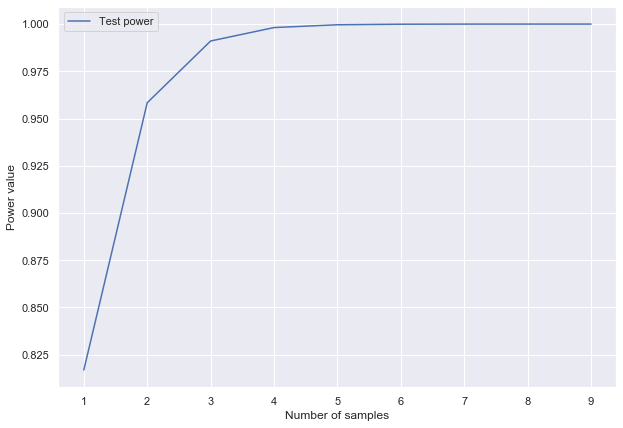

In [8]:
alpha = 0.05


def get_T(k, alpha=0.05):
    return scipy.stats.norm(loc=T1, scale=sigma1 / np.sqrt(k)).ppf(1 - alpha)

def get_power(k, T):
    return scipy.stats.norm(loc=T2, scale=sigma2 / np.sqrt(k)).sf(T)

powers = []
for k in range(1, 10):
    T = get_T(k=k, alpha=alpha)
    powers.append(get_power(k=k, T=T))

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(range(1, 10), powers, label='Test power')
ax.grid(True)
ax.legend()
ax.set_xlabel('Number of samples')
ax.set_ylabel('Power value')

plt.show()

**Выводы:** Мощность теста быстро растёт с увеличением размера выборки. Уже при пяти объектах мощность критерия достигает 1, что означает, что вероятность принять $H_0$ при условии, что верна $H_1$ стремится к 0.

### Задача 3

В 5 серии 13 сезона передачи “Разрушители легенд” проверялась справедливость выражения “know something like the back of one’s hand”. В эксперименте принимало участие 12 испытуемых. Каждому из них были предъявлены 10 фотографий похожих рук разных людей, среди которых они должны были угадать свою.
11 из 12 испытуемых выбрали свою фотографию.
\($H_0$\): испытуемые выбирают фотографии тыльной стороны руки наугад (\($p$=0.1\)).
\($H_1$\): испытуемые выбирают фотографию тыльной стороны своей собственной руки осознанно (\($p>0.1$\)).


Воспользуйтесь точным биномиальным критерием для проверки (H_0) против альтернативы (H_1). Для этого:

	• Постройте нулевое распределение статистики числа успехов в выборке распределения Бернулли с параметром p. Сформируйте выборку сами напрямую из условия задачи.
	• Напишите функцию, которая принимала бы на вход тройку чисел (np,nq,p0), где np – число успехов, nq – число неудач в выборке размера np + nq, p0 – значение параметра p, задающего нулевую гипотезу. Ваша функция должна возвращать значение достигаемого уровня значимости против правосторонней альтернативы.
	• Визуально сравните поведение значения, выдаваемые вашей функцией со стандартным тестом
    scipy.stats.binom_test(·)
	• Отвергается ли гипотеза (H_0) на достигаемом уровне значимости 0.05? p-value?

In [9]:
n_p, n_q, p = 11, 1, 0.1
n = n_p + n_q

data = np.random.binomial(1, p, [n])
data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

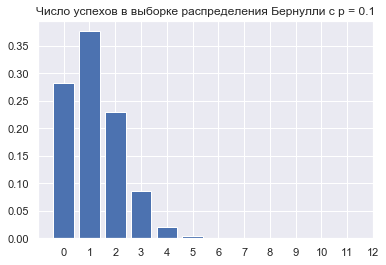

In [10]:
def plot_binom(n, p):
    plt.bar(np.arange(n), scipy.stats.binom(n=n, p=p).pmf(np.arange(n)))
    plt.xticks(np.arange(n + 1))
    
plot_binom(n, p)
plt.title('Число успехов в выборке распределения Бернулли с p = 0.1')
plt.show()

In [11]:
def get_p_value(n_p, n_q, p0):
    n = n_p + n_q
    return 1 - scipy.stats.binom(n=n, p=p0).cdf(n_p) + scipy.stats.binom(n=n, p=p0).pmf(n_p)

In [12]:
print('p-value:', get_p_value(n_p, n_q, p))
print('p-value', scipy.stats.binom_test([n_p, n_q], p=p, alternative='greater'))

p-value: 1.0899997787828001e-10
p-value 1.0900000000000006e-10


**Выводы:** $p_{value} \le \frac{\alpha}{2}$, следовательно гипотеза $H_0$ отвергается в пользу альтернативной гипотезы $H_1$

### Задача 4

24 умственно отсталых ребёнка с СДВГ в течение недели принимали либо метилфенидат, либо плацебо, а в конце недели проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, после недельного курса каждый испытуемые проходили второй тест.
Каков эффект препарата?

In [13]:
adhd = pd.read_csv("ADHD.txt", sep=' ')
adhd.sample(5)

,D0,D60
19,54,59
16,36,33
11,42,57
6,71,77
18,36,33


Чтобы использовать $t$-критерий Стьюдента для связанных выборок, необходимо проверить, нет ли существенных отклонений от нормальности попарных разностей. Для этого воспользуйтесь визуальной проверкой нормальности (функция `qqplot` из `statsmodels`), a также библиотечным тестом проверки нормальности: `scipy.stats.shapiro`

Test for D0. Statistics: 0.857, P-value: 0.003
Test for D60. Statistics: 0.916, P-value: 0.049
Test for D0 - D60. Statistics: 0.980, P-value: 0.892


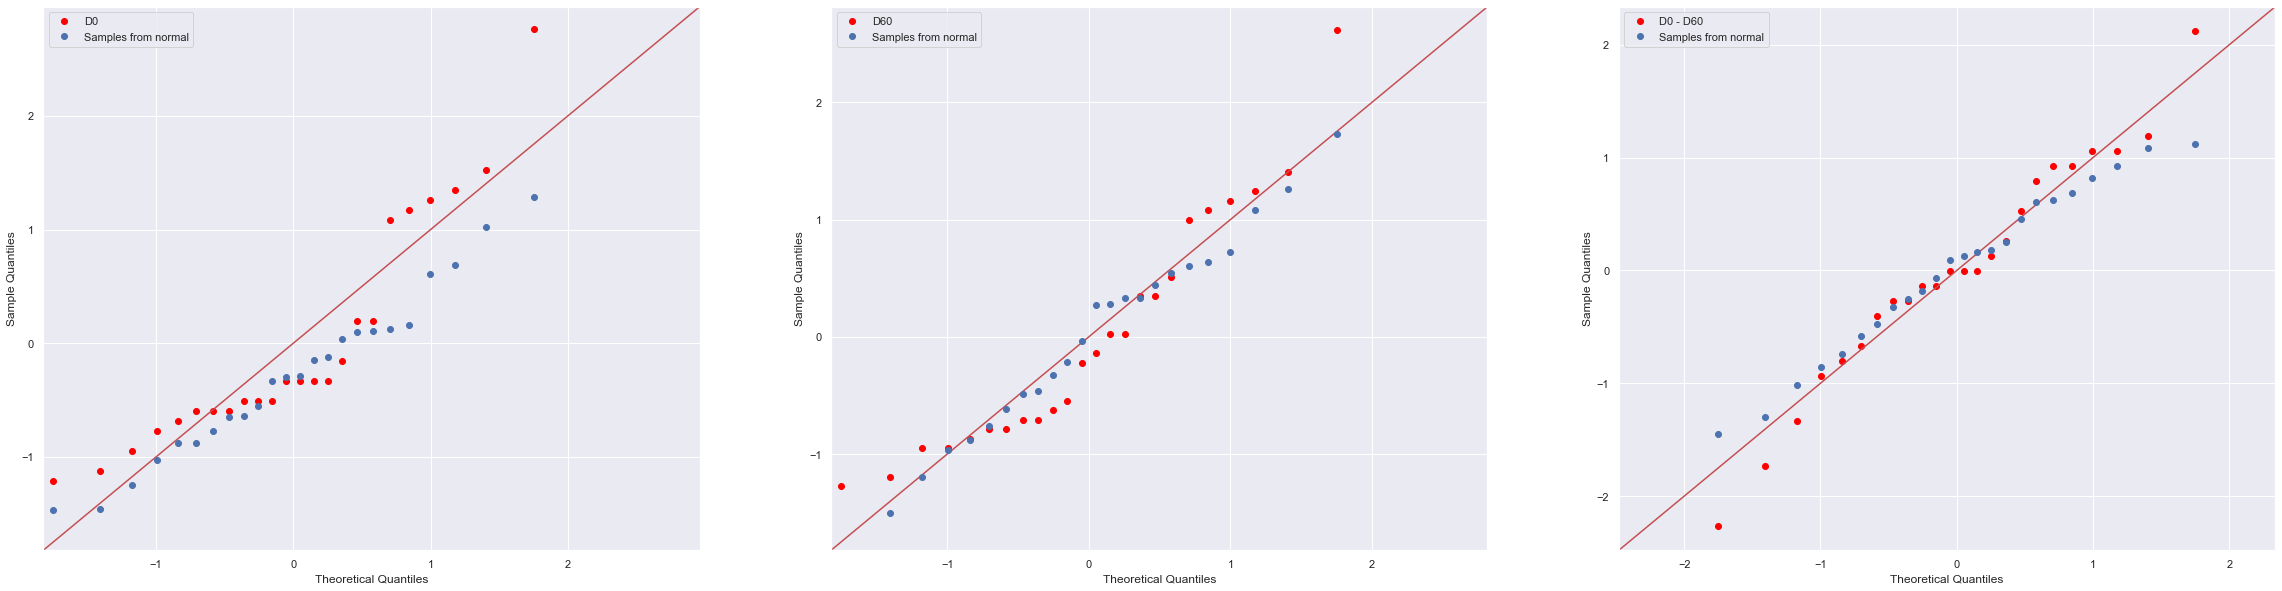

In [14]:
import statsmodels.graphics.gofplots

print("Test for D0. Statistics: {0:.3f}, P-value: {1:.3f}".format(*scipy.stats.shapiro(adhd['D0'])))
print("Test for D60. Statistics: {0:.3f}, P-value: {1:.3f}".format(*scipy.stats.shapiro(adhd['D60'])))
print("Test for D0 - D60. Statistics: {0:.3f}, P-value: {1:.3f}".format(*scipy.stats.shapiro(adhd['D0'] - adhd['D60'])))
fig, ax = plt.subplots(1, 3, figsize=(40, 10))

_ = statsmodels.graphics.gofplots.qqplot(
    (adhd['D0'] - np.mean(adhd['D0'])) / np.std(adhd['D0'], ddof=1), 
    ax=ax[0], line='45', color='red', label='D0'
)
_ = statsmodels.graphics.gofplots.qqplot(
    (adhd['D60'] - np.mean(adhd['D60'])) / np.std(adhd['D60'], ddof=1), 
    ax=ax[1], line='45', color='red', label='D60'
)
_ = statsmodels.graphics.gofplots.qqplot(
    ((adhd['D0'] - adhd['D60']) - np.mean(adhd['D0'] - adhd['D60'])) / np.std(adhd['D0'] - adhd['D60'], ddof=1), 
    ax=ax[2], line='45', color='red', label='D0 - D60'
)
_ = statsmodels.graphics.gofplots.qqplot(scipy.stats.norm.rvs(size=adhd.shape[0]), ax=ax[0], label='Samples from normal')
_ = statsmodels.graphics.gofplots.qqplot(scipy.stats.norm.rvs(size=adhd.shape[0]), ax=ax[1], label='Samples from normal')
_ = statsmodels.graphics.gofplots.qqplot(scipy.stats.norm.rvs(size=adhd.shape[0]), ax=ax[2], label='Samples from normal')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

Примените $t$-критерий Стьюдента `scipy.stats.ttest_rel` для связанных выборок.

In [15]:
scipy.stats.ttest_rel(adhd['D0'], adhd['D60'])

Ttest_relResult(statistic=-3.2223624451230406, pvalue=0.003771488176381471)

Если бы у нас не было информации о связях между выборками, пришлось бы применять версию критерия Стьюдента для независимых выборок `scipy.stats.ttest_ind`. Сравните результаты применения критерия Стьюдента к этим данным, если считать выборки связанными и не связанными. В какои из этих случаев уровень достигаемой значимости меньше? Как вы думаете почему?

In [16]:
scipy.stats.ttest_ind(adhd['D0'], adhd['D60'])

Ttest_indResult(statistic=-1.452163501815909, pvalue=0.1532433046938409)

**Выводы:**
* Сравнение QQ-графика для данных и для выборки из нормального распределения того же размера не позволяет сделать однозначного вывода о нормальности соответствующих распределений.
* Большое значение $p_{value}$ в тесте на нормальность Шапиро подтверждает гипотезу нормальности выборки из разностей D0 - D60. При этом, отдельно выборки D0, D60 считать нормально распределёнными нельзя.  
Таким образом применение t-критерия Стьюдента для связных выборок обоснованно.
* Применение теста для зависимых выборок показывает, что применение препарата увеличивает способность к подавлению импульсивных поведенческих реакций. При этом малое значение $p_{value}$ показывает, что нулевая гипотеза о том, что препарат с среднем не влияет на замеряемый параметр должна быть отвергнута в пользу альтернативы о том, что в среднем влияние присутсвует.
* Если рассматривать данную выборку как две серии независимых наблюдений получаем, что $p_{value}$ велико. Из этого следует, что отвергнуть нулевую гипотезу нельзя. Отличие результатов двух тестов можно объяснить тем, что во-втором случае теоретические гарантии применения теста нарушены, что не позволяет считать его результаты достоверными. Если даже предположить, что нарушение условий применимости влияет на результаты теста не сильно, то знание о связи значений в данных позволяет снизить дисперсию статистики, что в свою очередь приводит к уменьшению $p_{value}$.

### Задача 5

Задана выборка $Y$ результатов распознавания для некоторой задачи классификации.

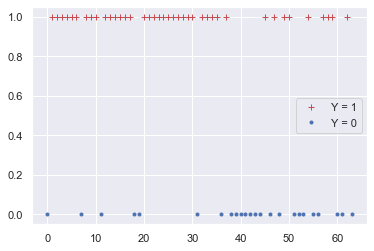

In [17]:
Y = pd.read_excel("t2_data.xlsx").values.ravel()

plt.plot(np.arange(Y.size)[Y == 1], np.count_nonzero(Y == 1) * [1], 'r+', label='Y = 1')
plt.plot(np.arange(Y.size)[Y == 0], np.count_nonzero(Y == 0) * [0], 'b.', label='Y = 0')
plt.legend()
plt.show()

Оцените доверительный интервал для показателя *ACCURACY* с использованием...

Метода Клоппера-Пирсона (с использованием аппроксимации через __бета__ распределение).

    http://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
    alpha confidence intervals for a binomial distribution of k expected successes on n trials

In [18]:
def bin_clopper_pearson(data, alpha=0.05, use_statmodels=False):
    x = np.sum(data)
    n = data.shape[0]
    
    if use_statmodels:
        return statsmodels.stats.proportion.proportion_confint(x, n, alpha, 'beta')
    
    return (
        scipy.stats.beta(x, n - x + 1).ppf(alpha / 2.0),
        scipy.stats.beta(x + 1, n - x).ppf(1.0 - alpha / 2.0)
    )

А также с помощью __нормальной__ аппроксимации

In [19]:
def bin_true(data, alpha=0.05):
    x = np.sum(data)
    n = data.shape[0]
    
    return statsmodels.stats.proportion.proportion_confint(x, n, alpha, 'binom_test')

def bin_normal_approx(data, alpha=0.05, use_statmodels=False):
    x = np.sum(data)
    n = data.shape[0]
    u = scipy.stats.norm.ppf(1 - alpha / 2)
    
    if use_statmodels:
        return statsmodels.stats.proportion.proportion_confint(x, n, alpha, 'normal')
    
    return (
        (x - u * np.sqrt(x / n * (n - x))) / (n),
        (x + u * np.sqrt(x / n * (n - x))) / (n)
    )

def bin_wilson_approx(data, alpha=0.05, use_statmodels=False):
    x = np.sum(data)
    n = data.shape[0]
    u = scipy.stats.norm.ppf(1 - alpha / 2)
    
    if use_statmodels:
        return statsmodels.stats.proportion.proportion_confint(x, n, alpha, 'wilson')

    return (
        (x + u ** 2 / 2.0 - u * np.sqrt(x / n * (n - x) + u ** 2 / 4.0)) / (n + u ** 2),
        (x + u ** 2 / 2.0 + u * np.sqrt(x / n * (n - x) + u ** 2 / 4.0)) / (n + u ** 2)
    )

Сравните результаты и сделайте выводы.

In [20]:
res = defaultdict(list)
res["alpha"] = alpha_list
res["True interval"] = [np.round(bin_true(Y, alpha), 3) for alpha in alpha_list]
res["Clopper-Pearson"] = [np.round(bin_clopper_pearson(Y, alpha, use_statmodels=False), 3) for alpha in alpha_list]
res["Normal"] = [np.round(bin_normal_approx(Y, alpha, use_statmodels=False), 3) for alpha in alpha_list]
res["Normal (SO)"] = [np.round(bin_wilson_approx(Y, alpha, use_statmodels=False), 3) for alpha in alpha_list]
res = pd.DataFrame(res)
res

,alpha,True interval,Clopper-Pearson,Normal,Normal (SO)
0,0.100,"[0.516, 0.718]","[0.515, 0.726]","[0.525, 0.725]","[0.522, 0.718]"
1,0.075,"[0.508, 0.727]","[0.506, 0.733]","[0.517, 0.733]","[0.514, 0.724]"
2,0.050,"[0.5, 0.736]","[0.495, 0.743]","[0.506, 0.744]","[0.503, 0.733]"
3,0.025,"[0.484, 0.753]","[0.478, 0.757]","[0.489, 0.761]","[0.485, 0.747]"
4,0.010,"[0.46, 0.772]","[0.457, 0.774]","[0.469, 0.781]","[0.464, 0.762]"


In [21]:
deltas = defaultdict(list)
deltas["alpha"] = alpha_list
deltas["Clopper-Pearson"] = [[np.round(lt - l, 3), np.round(rt - r, 3)] for (lt, rt), (l, r) in zip(res["True interval"], res["Clopper-Pearson"])]
deltas["Normal"] = [[np.round(lt - l, 3), np.round(rt - r, 3)] for (lt, rt), (l, r) in zip(res["True interval"], res["Normal"])]
deltas["Normal (SO)"] = [[np.round(lt - l, 3), np.round(rt - r, 3)] for (lt, rt), (l, r) in zip(res["True interval"], res["Normal (SO)"])]

deltas = pd.DataFrame(deltas)
deltas

,alpha,Clopper-Pearson,Normal,Normal (SO)
0,0.100,"[0.001, -0.008]","[-0.009, -0.007]","[-0.006, 0.0]"
1,0.075,"[0.002, -0.006]","[-0.009, -0.006]","[-0.006, 0.003]"
2,0.050,"[0.005, -0.007]","[-0.006, -0.008]","[-0.003, 0.003]"
3,0.025,"[0.006, -0.004]","[-0.005, -0.008]","[-0.001, 0.006]"
4,0.010,"[0.003, -0.002]","[-0.009, -0.009]","[-0.004, 0.01]"


Также сравните ваши реализованные метод с библиотечными: `statsmodels.stats.proportion.proportion_confint`, в вариантах  `proportion_confint(k, n, alpha, 'beta')` и `proportion_confint(k, n, alpha, 'normal')`

In [22]:
res = defaultdict(list)
res["alpha"] = alpha_list
res["True interval"] = [np.round(bin_true(Y, alpha), 3) for alpha in alpha_list]
res["Clopper-Pearson"] = [np.round(bin_clopper_pearson(Y, alpha, use_statmodels=False), 3) for alpha in alpha_list]
res["Clopper-Pearson Check"] = [np.round(bin_clopper_pearson(Y, alpha, use_statmodels=True), 3) for alpha in alpha_list]
res["Normal"] = [np.round(bin_normal_approx(Y, alpha, use_statmodels=False), 3) for alpha in alpha_list]
res["Normal Check"] = [np.round(bin_normal_approx(Y, alpha, use_statmodels=True), 3) for alpha in alpha_list]
res["Normal (SO)"] = [np.round(bin_wilson_approx(Y, alpha, use_statmodels=False), 3) for alpha in alpha_list]
res["Normal Check (SO)"] = [np.round(bin_wilson_approx(Y, alpha, use_statmodels=True), 3) for alpha in alpha_list]
res = pd.DataFrame(res)
res

,alpha,True interval,Clopper-Pearson,Clopper-Pearson Check,Normal,Normal Check,Normal (SO),Normal Check (SO)
0,0.100,"[0.516, 0.718]","[0.515, 0.726]","[0.515, 0.726]","[0.525, 0.725]","[0.525, 0.725]","[0.522, 0.718]","[0.522, 0.718]"
1,0.075,"[0.508, 0.727]","[0.506, 0.733]","[0.506, 0.733]","[0.517, 0.733]","[0.517, 0.733]","[0.514, 0.724]","[0.514, 0.724]"
2,0.050,"[0.5, 0.736]","[0.495, 0.743]","[0.495, 0.743]","[0.506, 0.744]","[0.506, 0.744]","[0.503, 0.733]","[0.503, 0.733]"
3,0.025,"[0.484, 0.753]","[0.478, 0.757]","[0.478, 0.757]","[0.489, 0.761]","[0.489, 0.761]","[0.485, 0.747]","[0.485, 0.747]"
4,0.010,"[0.46, 0.772]","[0.457, 0.774]","[0.457, 0.774]","[0.469, 0.781]","[0.469, 0.781]","[0.464, 0.762]","[0.464, 0.762]"


**Выводы:** Метод Клоппера-Пирсона является наиболее точным приближением для оценки доверительных интеравалов для данной выборки. Оценка с помощью нормального распределения является менее точным способом, однако, если выполнить "честную" оценку нормальным распределением (метод Вильсона), то полученные интервалы для больших значений $\alpha$ оказываются ближе к точным оценкам. 